<a href="https://colab.research.google.com/github/atmdatascience/python/blob/main/colab/An%C3%A1lisis_de_encuesta_intermedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo análisis de encuesta con Procesamiento del Lenguaje Natural

## Instalando módulo

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.7MB/s 
     |████████████████████████████████| 276kB 7.5MB/s 
     |████████████████████████████████| 1.4MB 8.2MB/s 
     |████████████████████████████████| 174kB 19.0MB/s 
     |████████████████████████████████| 6.8MB 20.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 2.0MB 41.0MB/s 
     |████████████████████████████████| 112kB 47.3MB/s 
     |████████████████████████████████| 1.7MB 37.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 211kB/s 
     |████████████████████████████████| 256kB 45.8MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 41.7MB/s 
     |████████████████████████████████| 1.1MB 30.5MB/s 
     |████████████████████████████████| 645kB 32.3MB/s

In [ ]:
pip install mlflow

## Activando modulos

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
import mlflow

## Activando Google Colab

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


## Armando el DataFrame

Obtención de datos y creación del dataframe

In [ ]:
encuesta = pd.read_excel("/content/drive/MyDrive/Calidad/Ciencia de Datos/Datasets/Datos.xlsx")

Visualización del dataframe

In [ ]:
encuesta.head(3)

,Nº,MES,DIRIGIDA A,TIPO,DETALLE
0,1,2,GESTION INTERNA,SUGERENCIA,"la unica sugerencia, es un poco mas de celerid..."
1,2,2,ATENCION CONTRIBUYENTE,QUEJA,"llevo 90 minutos al teléfono y nadie atiende, ..."
2,3,2,ATENCION CONTRIBUYENTE,QUEJA,es imposible comunicarse con ustedes y resolve...


Dimensión del dataframe, 933 registros y 5 columnas

In [ ]:
encuesta.shape

(933, 5)

Información de datos NaN y tipos de datos

In [ ]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nº          933 non-null    int64 
 1   MES         933 non-null    int64 
 2   DIRIGIDA A  894 non-null    object
 3   TIPO        933 non-null    object
 4   DETALLE     933 non-null    object
dtypes: int64(2), object(3)
memory usage: 36.6+ KB


## Configuración Pycaret

### Habilitando módulo NLP

In [ ]:
from pycaret.nlp import *

### Creando objeto, variable objetivo y variable id (semilla)

In [ ]:
analisisencuesta = setup(data = encuesta, target = "DETALLE", session_id = 2021, 
                         custom_stopwords = ["la", "de", "un", "en", "qué", "por", "se", "el", 
                                       "los", "me","un", "soy", "hay", "aún", "más", "al",
                                       "van", "hasta", "a", "tramite"],
                        log_experiment = True, experiment_name = "encuesta01")


Description,Value
session_id,2021
Documents,933
Vocab Size,555
Custom Stopwords,True


+ Sesion id = semilla para evitar aletoriedad.
+ Documentos, cantidad de registros
+ Vocab Size, corpus, bolsa de palabras

### Creación del modelo

#### Algoritmos disponibles

In [ ]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


#### Latent Dirichlet Allocation (lda)

In [ ]:
lda = create_model("lda", num_topics = 5, multi_core = True)

In [ ]:
print(lda)

LdaModel(num_terms=555, num_topics=5, decay=0.5, chunksize=100)


### Asignación del modelo

In [ ]:
lda_resultados = assign_model(lda)
lda_resultados.head()

,Nº,MES,DIRIGIDA A,TIPO,DETALLE,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,1,2,GESTION INTERNA,SUGERENCIA,resolucion,0.599994,0.100001,0.100001,0.100001,0.100001,Topic 0,0.60
1,2,2,ATENCION CONTRIBUYENTE,QUEJA,telefono gestion,0.405680,0.066671,0.066671,0.066671,0.394307,Topic 0,0.41
2,3,2,ATENCION CONTRIBUYENTE,QUEJA,imposible comunicarse,0.066669,0.066669,0.732690,0.066669,0.067303,Topic 2,0.73
3,4,2,ATENCION CONTRIBUYENTE,QUEJA,,0.200000,0.200000,0.200000,0.200000,0.200000,Topic 0,0.20
4,5,2,GESTION INTERNA,SUGERENCIA,expediente presentado,0.733286,0.066679,0.066678,0.066679,0.066678,Topic 0,0.73


### Graficando el modelo

La función plot_model () se puede usar para analizar el corpus general o solo temas específicos extraídos a través del modelo de temas. Por lo tanto, la función plot_model () también puede funcionar sin pasar ningún objeto de modelo entrenado.

#### Distribución de frecuencia de todo el corpus

In [ ]:
plot_model()


#### Bigramas

In [ ]:
plot_model(plot = "bigram")


#### Distribución de los topicos


In [ ]:
plot_model(lda, plot = "topic_distribution")


#### Distribución t-SNE


In [ ]:
plot_model(lda, plot = "tsne")


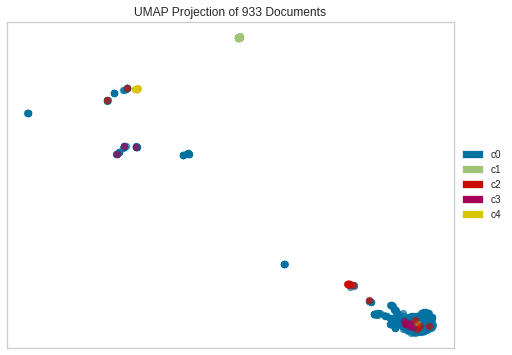

In [ ]:
plot_model(lda, plot = "umap")

### Evaluación del modelo

In [ ]:
evaluate_model(lda)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

### Optimizando el modelo

In [ ]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:41:36
Status,. . . . . . . . . . . . . . . . . .,Finalizing
Step,. . . . . . . . . . . . . . . . . .,Evaluating Coherence With 400 Topics


Best Model: Latent Dirichlet Allocation | # Topics: 400 | Coherence: 0.6792


### Evaluación extrínseca con clasificador

In [ ]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = "MES")

IntProgress(value=0, description='Processing: ', max=25)

Output()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:38:53
Status,. . . . . . . . . . . . . . . . . .,Finalizing
Step,. . . . . . . . . . . . . . . . . .,Evaluating Regressor With 400 Topics


Best Model: Latent Dirichlet Allocation | # Topics: 4 | R2 : 0.9111


In [ ]:
!mlflow ui